# Worksheet 15

Name:  Jason Kwan

UID: U61451841

### Topics

- Support Vector Machines

## Support Vector Machines

a) Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import random 

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

# Dataset
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

# Initializing w and b
w = np.array([1, 1])
b = 0.1

# Perceptron Parameters
epochs = 100
alpha = .05
expanding_rate = .99
retracting_rate = 1.1

def snap(x, w, b, error):
    """
        Plot the street induced by w and b.
        Circle the point x in red if it was
        misclassified or in yellow if it was
        classified correctly.
    """

    xplot = np.linspace(-3, 3)
    cs = np.array([x for x in 'gb'])

    svm = (-w[0]*xplot - b) / w[1]
    left_svm = (-w[0]*xplot - b - 1) / w[1]
    right_svm = (-w[0]*xplot - b + 1) / w[1]

    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='y',fill=False))
    ax.plot(xplot, left_svm, 'g--', lw=2)
    ax.plot(xplot, svm, 'r-', lw=2)
    ax.plot(xplot, right_svm, 'b--', lw=2)
    ax.set_xlim(min(X[:, 0]) - 1, max(X[:,0]) + 1)
    ax.set_ylim(min(X[:, 1]) - 1, max(X[:,1]) + 1)
    fig.savefig(TEMPFILE)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE)))


images = []
for _ in range(epochs):
    # pick a point from X at random
    i = random.randint(0, len(X)-1)
    x, y = X[i], Y[i]
    error = False

    if y*(np.dot(w, x) + b) <= 0:
        w = w + alpha * y * x
        b = b + alpha * y
        error = True
                    
    images.append(snap(x, w, b, error))

images[0].save(
    'svm.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

b) Consider the following dataset:

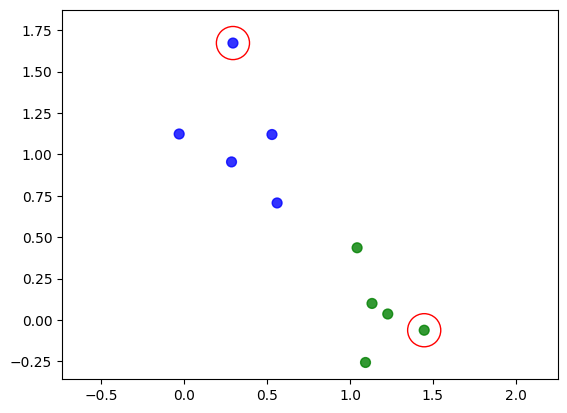

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

If the red points are moved closer to the green points, the SVM would adjust its decision boundary to separate the two classes of points. If the red points are moved further away from the green points, the SVM would still try to maximize the margin between the two classes.

c) If we were to fit an SVM to the above dataset, which points do you think would affect the decision boundary the most? Circle them in red.

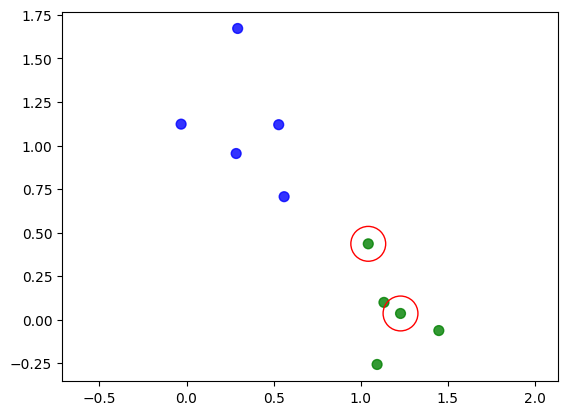

In [3]:
centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[2][0], X[2][1]), .1, color='r',fill=False)) 
ax.add_patch(plt.Circle((X[3][0], X[3][1]), .1, color='r',fill=False)) 
plt.show()